In [0]:

import pandas as pd
import numpy as np
# to set up plotting 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

#Reading the cvs file
fl = 'https://raw.githubusercontent.com/kiranvasudev/artist/master/artist_data.csv'
df = pd.read_csv(fl) 

# dropping null value columns to avoid errors 
df.dropna(inplace = True) 

# Printing the file de vizualize it
print(df.columns)
df.head(5)


Index(['id', 'name', 'gender', 'dates', 'yearOfBirth', 'yearOfDeath',
       'placeOfBirth', 'placeOfDeath', 'url'],
      dtype='object')


,id,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url
1,0,"Abbey, Edwin Austin",Male,1852–1911,1852.0,1911.0,"Philadelphia, United States","London, United Kingdom",http://www.tate.org.uk/art/artists/edwin-austi...
2,2756,"Abbott, Berenice",Female,1898–1991,1898.0,1991.0,"Springfield, United States","Monson, United States",http://www.tate.org.uk/art/artists/berenice-ab...
3,1,"Abbott, Lemuel Francis",Male,1760–1803,1760.0,1803.0,"Leicestershire, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/lemuel-fran...
5,2606,Absalon,Male,1964–1993,1964.0,1993.0,"Tel Aviv-Yafo, Yisra'el","Paris, France",http://www.tate.org.uk/art/artists/absalon-2606
10,2411,"Adam, Robert",Male,1728–1792,1728.0,1792.0,"Kirkcaldy, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/robert-adam...


In all of the artists' artwork that lives in the Museums, in which country where the most artists born in? Is there a particular city from where they come from most often?

In [3]:
# new data frame with split value columns placeOfBirth
birth = df["placeOfBirth"].str.split(',' , n = 1, expand = True) 
  
# making separate cityOfBirth column from new data frame 
df["cityOfBirth"] = birth[0] 
  
# making separate countryOfBirth column from new data frame 
df["countryOfBirth"] = birth[1] 

# Dropping old placeOfBirth columns 
df.drop(columns=["placeOfBirth"], inplace = True) 

df.head(5)


,id,name,gender,dates,yearOfBirth,yearOfDeath,placeOfDeath,url,cityOfBirth,countryOfBirth
1,0,"Abbey, Edwin Austin",Male,1852–1911,1852.0,1911.0,"London, United Kingdom",http://www.tate.org.uk/art/artists/edwin-austi...,Philadelphia,United States
2,2756,"Abbott, Berenice",Female,1898–1991,1898.0,1991.0,"Monson, United States",http://www.tate.org.uk/art/artists/berenice-ab...,Springfield,United States
3,1,"Abbott, Lemuel Francis",Male,1760–1803,1760.0,1803.0,"London, United Kingdom",http://www.tate.org.uk/art/artists/lemuel-fran...,Leicestershire,United Kingdom
5,2606,Absalon,Male,1964–1993,1964.0,1993.0,"Paris, France",http://www.tate.org.uk/art/artists/absalon-2606,Tel Aviv-Yafo,Yisra'el
10,2411,"Adam, Robert",Male,1728–1792,1728.0,1792.0,"London, United Kingdom",http://www.tate.org.uk/art/artists/robert-adam...,Kirkcaldy,United Kingdom


In [4]:
# the country where the most artists are born in
df["countryOfBirth"].value_counts().head(1)

 United Kingdom    741
Name: countryOfBirth, dtype: int64

In [5]:
# the city from where they come from most often
df["cityOfBirth"].value_counts().head(1)

London    232
Name: cityOfBirth, dtype: int64

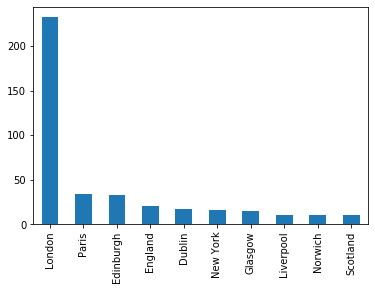

In [6]:
# Plot the result 
df["cityOfBirth"].value_counts().head(10).plot.bar()

What is the distribution of ages of the artists? What is the average life span of an artist ?

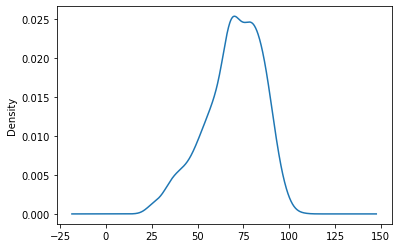

In [7]:
# add a new column with the a age of each artist
df['age'] = df["yearOfDeath"] - df["yearOfBirth"]

# plot by age to vizualize the destribution of ages
df['age'].plot(kind='kde')

In [8]:
# the avg lifespan 
df['age'].mean()

69.67509025270758

What is the ratio of Male to Female artists?

In [9]:
df.groupby('gender')['gender'].count()

gender
Female     118
Male      1267
Name: gender, dtype: int64

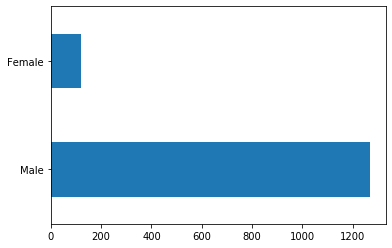

In [10]:
# Plot by gender
df['gender'].value_counts()[:20].plot(kind='barh')

find How many males and females are born in each country

In [11]:
gd = df.groupby("countryOfBirth")["gender"]
gd.apply(lambda x:x.value_counts())

countryOfBirth        
 Al-Jaza'ir     Male       1
 Argentina      Male       2
                Female     2
 Australia      Male      12
 Bahamas        Male       1
                          ..
 Zhonghua       Male       3
 Éire           Male      28
                Female     3
 Österreich     Male      10
                Female     2
Name: gender, Length: 74, dtype: int64

In [12]:
# select the name and age of the artist and get some statistical informations 
cols =['yearOfBirth', 'yearOfDeath' , 'age']
nf = df[cols]
nf.describe()

,yearOfBirth,yearOfDeath,age
count,1385.000000,1385.000000,1385.000000
mean,1850.115523,1919.790614,69.675090
std,70.658973,73.722753,15.533848
min,1497.000000,1543.000000,23.000000
25%,1815.000000,1882.000000,60.000000
50%,1868.000000,1939.000000,71.000000
75%,1901.000000,1974.000000,81.000000
max,1966.000000,2013.000000,106.000000


In [16]:
# Get the median year of birth and death 

nf['yearOfBirth'].median()
nf['yearOfDeath'].median()


1939.0